In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import logistic
from math import exp
# convert a attribute file into attribute list: [[typename],[type1,type2,type3],[1,2,3]]
attribute = []
attribute.append([[""],[0],[1]])
with open('game_attributes.txt', 'r', encoding='utf-8') as attributes:
    for line in attributes:
        line = [x.strip("\n").split(",") for x in line.split(":")]
        line[1] = [x.strip(" ") for x in line[1]]
        line.append([x for x in range(len(line[1]))])
        print(line)
        attribute.append(line)
print(attribute)

[['dayOfWeek'], ['Weekday', 'Saturday', 'Sunday'], [0, 1, 2]]
[['timeOfDay'], ['morning', 'afternoon', 'evening'], [0, 1, 2]]
[['timeToPlay'], ['<30', '30-60', '>60'], [0, 1, 2]]
[['mood'], ['silly', 'happy', 'tired'], [0, 1, 2]]
[['friendsVisiting'], ['no', 'yes'], [0, 1]]
[['kidsPlaying'], ['no', 'yes'], [0, 1]]
[['atHome'], ['no', 'yes'], [0, 1]]
[['snacks'], ['no', 'yes'], [0, 1]]
[['game'], ['ApplesToApples', 'SettersOfCatan'], [0, 1]]
[[[''], [0], [1]], [['dayOfWeek'], ['Weekday', 'Saturday', 'Sunday'], [0, 1, 2]], [['timeOfDay'], ['morning', 'afternoon', 'evening'], [0, 1, 2]], [['timeToPlay'], ['<30', '30-60', '>60'], [0, 1, 2]], [['mood'], ['silly', 'happy', 'tired'], [0, 1, 2]], [['friendsVisiting'], ['no', 'yes'], [0, 1]], [['kidsPlaying'], ['no', 'yes'], [0, 1]], [['atHome'], ['no', 'yes'], [0, 1]], [['snacks'], ['no', 'yes'], [0, 1]], [['game'], ['ApplesToApples', 'SettersOfCatan'], [0, 1]]]


In [3]:
# vectorize file into vector with one-hot
def vectorize1(filename):
    x = []
    y = []
    with open(filename, 'r', encoding='utf-8') as data:
        for line in data:
            line = [x.strip() for x in line.split(',')]
            vector = [1]
            for i in range(len(line)):
                index = attribute[i+1][1].index(line[i])                
                if i <= 3:
                    value = [0,0,0]
                    value[index] = 1
                    vector+= value
                elif len(line)-1>i>3 :
                    value = attribute[i+1][2][index]
                    vector.append(value)
                else:
                    y.append(index)
            x.append(vector)
        return x,y


In [4]:
x_train, y_train = vectorize1('game_attrdata_train.dat')
x_test, y_test = vectorize1('game_attrdata_test.dat')


In [5]:

def sigmoid(x):
    if x >= 0:
        z = exp(-x)
        return 1 / (1 + z)
    else:
        z = exp(x)
        return z / (1 + z)

def h(x,w):
    if np.dot(x,w)>= 0:
        return 1
    else:
        return 0

def h1(x,w):
    wx = np.dot(w,x)
    h = sigmoid(wx)
    return h
    
def accuracy(w,x,y):
    true = 0
    accura = 0
    for i in range(len(y)):
        if h(x[i],w) == y[i]:
            true+= 1
    accura = true/len(y)
    return accura

def accuracy1(w,x,y):
    true = 0
    for i in range(len(y)):
        if h1(x[i],w)>= 0.5:
            a = 1
        else: a = 0
        if a == y[i]:
            true+= 1
    accuracy = true/len(x)
    return accuracy

In [6]:
def logistic(x_train,x_test,iter):
    w = np.zeros([len(x_train[0])])
    t = np.zeros([len(x_train[0])])
    acc = [[],[],[],[]]
    for k in range(iter):
        for i in range(len(x_train)):
            hw = h1(x_train[i],w)
            change = (y_train[i]-hw)*hw*(1-hw)
            w = w+ np.multiply(x_train[i], change)
            t = t + w
        ta = np.multiply(t, 1/((k+1)*(i+1))) 
        acc[0].append(accuracy1(w,x_train,y_train))
        acc[1].append(accuracy1(ta,x_train,y_train))
        acc[2].append(accuracy1(w,x_test,y_test))
        acc[3].append(accuracy1(ta,x_test,y_test))
    return acc,w,ta

In [7]:
# acc is accuracy list[[],[],[],[]]. 0 is current model on train, 1 is average model on train, 
# 2 is current model on test, 3 is average model on test

# trainning iteration

def perceptron(x_train,x_test,iter):
    w = np.random.randn(len(x_train[0]))
    t = np.zeros([len(x_train[0])])
    ta = np.zeros([len(x_train[0])])
    acc = [[],[],[],[]]
    x=[]
    for k in range(0,iter):
        for i in range(len(x_train)):
            change = (y_train[i]-h(x_train[i],w))
            w = w+ np.multiply(x_train[i], change)
            t = t + w
        if (k+1)% 10 == 0:
            ta = np.multiply(t, 1/((k+1)*(i+1))) 
            x.append((k+1))
            acc[0].append(accuracy(w,x_train,y_train))
            acc[1].append(accuracy(ta,x_train,y_train))
            acc[2].append(accuracy(w,x_test,y_test))
            acc[3].append(accuracy(ta,x_test,y_test))
    return acc,w,ta,x


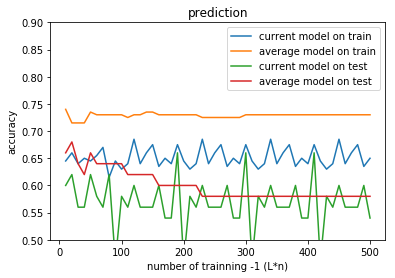

In [8]:

acc,w,ta,x = perceptron(x_train,x_test,500)
def plotaccuracy(acc,title):
    plt.plot(x,acc[0],label = "current model on train")
    plt.plot(x,acc[1],label = "average model on train")
    plt.plot(x,acc[2],label = "current model on test")
    plt.plot(x,acc[3],label = "average model on test")
    
    plt.ylabel("accuracy")
    plt.ylim(0.5, 0.9)
    plt.xlabel("number of trainning -1 (L*n)")
    plt.title(title)
    plt.legend()
    plt.show()
plotaccuracy(acc,"prediction")
# " the current model work better than the average model"

In [9]:
def Q_c(x_train,x_test,acc,attribute,x):
    ymax = max(acc[3])
    pos = acc[3].index(ymax)
    xmax = x[pos]
    acc,w,ta,x = perceptron(x_train,x_test,xmax)
    print("c)\nafter",xmax,"training epoch the best model is\n",ta)
    math_d = ""
    wmax = 0
    max_index = 0
    X = ["x0",'Weekday', 'Saturday', 'Sunday', 'morning', 'afternoon', 'evening','<30', '30-60', '>60', 'silly', 'happy', 'tired', 'friendsVisiting','kidsPlaying', 'atHome', 'snacks']
    for i in range(len(ta)):
        if i ==0:
            pos = i
        elif 11>i >0:
            pos = int((i+1)/3)
        else:
            pos = int((i-7))
        if abs(ta[i])>wmax:
            max_index=pos
            wmax = ta[i]
        if i==0 or ta[i]<0:
            math_d += str(ta[i])+"(%s) "%(X[i])
        elif ta[i] >=0:
            math_d += "+"+str(ta[i])+"(%s) "%(X[i])
    print(
    """
    so the math description of decision function is w·X = %s
    where threshold is 0, if bigger than threshold then predict value is SettersOfCatan, and otherwise
    X = ["x0",'Weekday', 'Saturday', 'Sunday', 'morning', 'afternoon', 'evening','<30', '30-60', '>60', 'silly', 'happy', 'tired', 'friendsVisiting','kidsPlaying', 'atHome', 'snacks']
    the attribute %s plays the most important role that have coeffecient %d
    """%(math_d,attribute[max_index][0][0],wmax)
    )
Q_c(x_train,x_test,acc,attribute,x)

c)
after 20 training epoch the best model is
 [ 0.02734839  1.73149978 -0.55099919  1.03872731  0.38603673  0.73171068
  0.73264337  0.40570017  0.04827122  0.76710859 -2.85649724  2.89113724
 -0.307352   -0.3500191   1.33104673  0.63808329 -1.17080355]

    so the math description of decision function is w·X = 0.027348388348642623(x0) +1.731499777781979(Weekday) -0.5509991932226769(Saturday) +1.038727312246936(Sunday) +0.3860367314441428(morning) +0.7317106793531373(afternoon) +0.7326433674929432(evening) +0.4057001708461249(<30) +0.04827121859303583(30-60) +0.7671085893744956(>60) -2.8564972369014776(silly) +2.89113723912283(happy) -0.3073519964441628(tired) -0.3500190989337935(friendsVisiting) +1.3310467337447434(kidsPlaying) +0.6380832888500813(atHome) -1.1708035491655584(snacks) 
    where threshold is 0, if bigger than threshold then predict value is SettersOfCatan, and otherwise
    X = ["x0",'Weekday', 'Saturday', 'Sunday', 'morning', 'afternoon', 'evening','<30', '30-60', '>60

In [30]:

def subplotaccuracy(acc,axes,fig,i,title,xx):
    x = int(i/2)
    y = i-2*int(i/2)
    #axes[x, y].plot(xx,acc[0],label = "current model on train")
    #axes[x, y].plot(xx,acc[1],label = "average model on train")
    #axes[x, y].plot(xx,acc[2],label = "current model on test")
    axes[x, y].plot(xx,acc[3],label = "average model on test")
    #axes[int(i/2), i-2*int(i/2)].legend()
    axes[x, y].set_ylabel("accuracy")
    axes[x, y].set_xlabel("number of trainning -1 (L*n)")
    axes[x, y].set_title(title)
    

d)
without attribute ['dayOfWeek'] accuracy: 0.66
without attribute ['timeOfDay'] accuracy: 0.64
without attribute ['timeToPlay'] accuracy: 0.58
without attribute ['mood'] accuracy: 0.6
without attribute ['friendsVisiting'] accuracy: 0.58
without attribute ['kidsPlaying'] accuracy: 0.68
without attribute ['atHome'] accuracy: 0.56
without attribute ['snacks'] accuracy: 0.6
the most important attribute according to ablation is ['atHome']


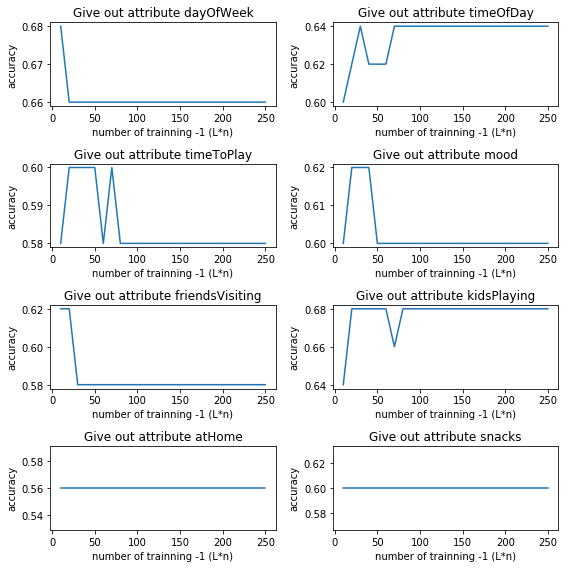

In [31]:
def ablation(x_train,x_test,isprint):
    if isprint:
        fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 8))
        print("d)")
    min =100
    amin = 9
    for i in range(8):
        acc = [[],[],[],[]]

        if i*3 <12:
            x_trim1 = [x[0:(i)*3+1]+x[(i+1)*3+1:] for x in x_train]
            x_trim2 = [x[0:(i)*3+1]+x[(i+1)*3+1:] for x in x_test]
        elif i <=7:
            x_trim1 = [x[0:9+i]+x[10+i:] for x in x_train]
            x_trim2 = [x[0:9+i]+x[10+i:] for x in x_test]
        else:
            x_trim1 = [x[0:9+i]for x in x_train]
            x_trim2 = [x[0:9+i]for x in x_train]
        w = np.zeros([len(x_trim1[0])])
        t = np.zeros([len(x_trim2[0])])
        acc,w,ta,xx = perceptron(x_trim1,x_trim2,250)
        if acc[3][-1]<min:
            min = acc[3][-1]
            att = i+1
        if isprint:
            print("without attribute",attribute[i+1][0],"accuracy:",acc[3][-1])
            subplotaccuracy(acc,axes,fig,i,"Give out %s %s"%("attribute",attribute[i+1][0][0]),xx)

    if isprint:
        print("the most important attribute according to ablation is",attribute[att][0])
        fig.tight_layout()
        plt.show()
    else:
        return attribute[att][0]
ablation(x_train,x_test,True)


In [32]:
def Q_e(x_train,x_test,attribute,times):
    a1 = []
    a2 = []
    for j in range(times):
        acc,w,ta,x = perceptron(x_train,x_test,250)
        wmax = 0
        max_index = 0
        X = ["x0",'Weekday', 'Saturday', 'Sunday', 'morning', 'afternoon', 'evening','<30', '30-60', '>60', 'silly', 'happy', 'tired', 'friendsVisiting','kidsPlaying', 'atHome', 'snacks']
        for i in range(len(ta)):
            if i ==0:
                pos = i
            elif 11>i >0:
                pos = int((i+1)/3)
            else:
                pos = int((i-7))
            if abs(ta[i])>wmax:
                max_index=pos
                wmax = ta[i]
        a1.append(attribute[max_index][0])
        a2.append(ablation(x_train,x_test,False))
    print(a1)
    print(a2)
    return a1,a2

a1,a2 = Q_e(x_train,x_test,attribute,50)



[['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], ['mood'], [''], ['mood'], ['mood'], ['mood'], ['mood']]
[['friendsVisiting'], ['timeToPlay'], ['atHome'], ['timeToPlay'], ['timeToPlay'], ['timeOfDay'], ['timeToPlay'], ['timeToPlay'], ['timeToPlay'], ['timeOfDay'], ['timeOfDay'], ['timeToPlay'], ['timeToPlay'], ['timeToPlay'], ['timeToPlay'], ['timeOfDay'], ['timeToPlay'], ['timeToPlay'], ['timeToPlay'], ['timeToPlay'], ['timeToPlay'], ['timeToPlay'], ['atHome'], ['timeToPlay'], ['timeToPlay'], ['timeToPlay'], ['timeOfDay'], ['timeToPlay'], ['timeOfDay'], ['friendsVisiting'], ['friendsVisiting'], ['atH

In [40]:
kk = {}
for i in range(len(a2)):
    if a2[i][0] not in kk:
        kk[a2[i][0]]=0
    kk[a2[i][0]]+=1
print(kk)

{'friendsVisiting': 6, 'timeToPlay': 27, 'atHome': 5, 'timeOfDay': 11, 'snacks': 1}


In [ ]:
print("""

e) Examine the weights is better because it's more easy to find out the most important attribute than ablation test, with more efficiency and accuracy if the model is good enough. Also if the weights are close on the influential attributes it's hard to figure out just by ablation test. Simply comparing different accuracy by ablation test is not fair because with different attributes the models are different.

f) The averaged model should be better because it generalize better to test data than the final train model.
""")